In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf # needed for p-value calculation

#t, N, N_error = np.loadtxt('data/decay_data.txt', unpack=True)
from google.colab import files
decay_data = files.upload()
t, N, N_error = np.loadtxt('decay_data.txt', unpack=True)

def func_exp_bkg(t,a,b,bkg):
    return a*np.exp(-t/b) + bkg

popt2, pcov2 = curve_fit(func_exp_bkg, t, N, sigma=N_error, absolute_sigma=True)

Fit2_tau_error = pcov2[1,1]**0.5
Fit2_tau = popt2[1]
print('\n tau = ',Fit2_tau,'1/d +/-', Fit2_tau_error,' 1/d')

Fit2_t = popt2[1]*np.log(2)
Fit2_t_error = Fit2_t * np.sqrt((Fit2_tau_error/Fit2_tau)**2)
print('\n Half live = ', Fit2_t, 'd +/- ', Fit2_t_error,' d \n')



Saving decay_data.txt to decay_data (3).txt

 tau =  3.8220262056271297 1/d +/- 0.14352840432137456  1/d

 Half live =  2.6492266884566704 d +/-  0.09948630878562864  d 



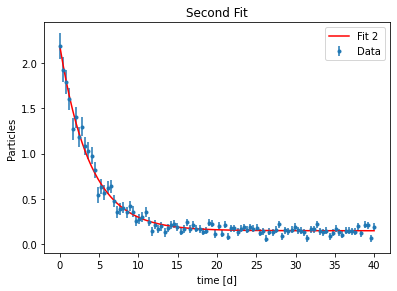

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.errorbar(t,N,yerr = N_error, fmt='.', label = 'Data') ##
axes.plot(t,func_exp_bkg(t,*popt2),'r-', label = 'Fit 2') ##

axes.set_title('Second Fit')
axes.set_xlabel('time [d]')
axes.set_ylabel('Particles')
axes.legend();

In [9]:
#check chiq
Fit2_chisq = np.sum( (N - func_exp_bkg(t,*popt2))**2/N_error**2)
dof_2 = len(N) - len(popt2)

#p-value
Fit2_pvalue = sf.gammaincc(dof_2/2.0, Fit2_chisq/2.0)

print('Fit 2 results:\n')
print(' chi2 = ',Fit2_chisq,'\n dof = ', dof_2, '\n reduced chi2 = ', Fit2_chisq/dof_2, '\n p-value = ',Fit2_pvalue)

Fit 2 results:

 chi2 =  100.93476476825123 
 dof =  97 
 reduced chi2 =  1.0405645852397034 
 p-value =  0.3720246697284879
